In [19]:
import os
os.chdir('C:\\Users\\User\\Documents\\stat2020\\ass3')
os.getcwd()

'C:\\Users\\User\\Documents\\stat2020\\ass3'

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [21]:
orig_df = pd.read_excel('Assignment3_cluster2.xlsx',sheet_name='2563')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,10464.6,85315.0,69550.0,329166.3,24275.0
1,b,4076.1,3087.5,6567.2,10321.9,15056.2
2,c,92346.6,24777.8,15433.6,5162.5,95632.9
3,d,13093.2,6734.3,3108.5,873.7,225866.3
4,e,2754.0,2558.6,468.3,1483.9,1662.8


<AxesSubplot:>

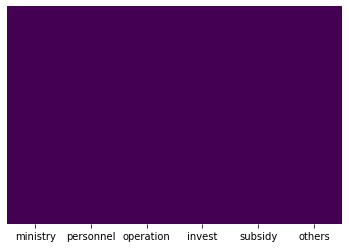

In [22]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28887.363636,10587.104545,20770.400000,40418.654545,19114.995455
std,54018.442587,18220.828540,38076.640032,87367.702633,50666.907292
min,808.600000,536.700000,468.300000,31.200000,154.900000
25%,2450.800000,1516.550000,962.200000,933.375000,810.300000
50%,9969.700000,2949.850000,5451.900000,2314.350000,1938.200000
75%,17641.875000,13698.425000,20389.600000,13773.700000,6385.950000
max,230196.300000,85315.000000,165887.200000,329166.300000,225866.300000


In [24]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [25]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,10464.6,85315.0,69550.0,329166.3,24275.0
1,4076.1,3087.5,6567.2,10321.9,15056.2
2,92346.6,24777.8,15433.6,5162.5,95632.9
3,13093.2,6734.3,3108.5,873.7,225866.3
4,2754.0,2558.6,468.3,1483.9,1662.8
5,1552.5,1068.9,1315.9,740.8,1393.2
6,2745.1,2812.2,645.1,14924.3,154.9
7,11700.1,1012.7,9091.6,104146.9,1944.2
8,24706.3,13751.9,67815.5,2700.8,859.2
9,9684.5,2500.4,165887.2,59.1,708.9


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.042095,1.000000,0.417617,1.000000,0.106863
1,0.014244,0.030088,0.036869,0.031266,0.066019
2,0.399054,0.285935,0.090469,0.015590,0.423009
3,0.053554,0.073104,0.015961,0.002560,1.000000
4,0.008481,0.023849,0.000000,0.004414,0.006681


In [27]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.122407,0.118549,0.122731,0.122708,0.084001
std,0.235490,0.214923,0.230183,0.265446,0.224477
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007159,0.011558,0.002986,0.002741,0.002904
50%,0.039937,0.028464,0.030127,0.006937,0.007901
75%,0.073384,0.155249,0.120429,0.041753,0.027606
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

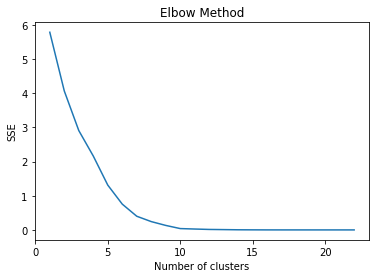

In [28]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [29]:
k = 6

In [30]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [31]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,10464.6,85315.0,69550.0,329166.3,24275.0,2
1,4076.1,3087.5,6567.2,10321.9,15056.2,1
2,92346.6,24777.8,15433.6,5162.5,95632.9,0
3,13093.2,6734.3,3108.5,873.7,225866.3,3
4,2754.0,2558.6,468.3,1483.9,1662.8,1
5,1552.5,1068.9,1315.9,740.8,1393.2,1
6,2745.1,2812.2,645.1,14924.3,154.9,1
7,11700.1,1012.7,9091.6,104146.9,1944.2,1
8,24706.3,13751.9,67815.5,2700.8,859.2,1
9,9684.5,2500.4,165887.2,59.1,708.9,4


In [32]:
df.to_csv('res_2563.csv')

In [33]:
df.cluster_id.value_counts()

1    14
0     4
5     1
4     1
3     1
2     1
Name: cluster_id, dtype: int64

In [34]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.4827395288271363


In [35]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.4747276679025629


In [36]:
df[df.cluster_id==0].mean()

personnel     125587.025
operation      19566.200
invest         19197.675
subsidy        26932.350
others         26960.350
cluster_id         0.000
dtype: float64